<a href="https://colab.research.google.com/github/VvS-2403/smart-obesity-predictor/blob/main/ImageDenoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

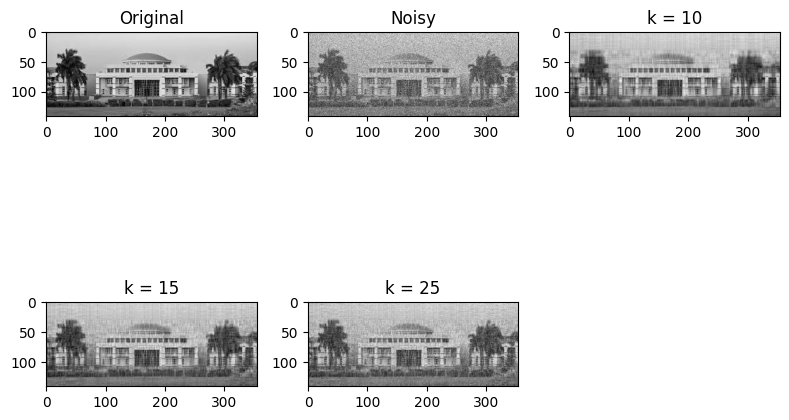

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io

# Load grayscale image
img = io.imread("Untitled.jpg")
img_gray = color.rgb2gray(img)
img_gray = img_gray.astype(float)

# Add Gaussian noise
noise = np.random.normal(0, 0.10, img_gray.shape)
img_noisy = img_gray + noise

# Perform SVD
U, S, VT = np.linalg.svd(img_noisy, full_matrices=False)

def low_rank(k):
    S_k = np.zeros_like(S)
    S_k[:k] = S[:k]
    return U @ np.diag(S_k) @ VT

# Reconstructions
rank10  = low_rank(10)
rank50  = low_rank(15)
rank100 = low_rank(25)

# Plot results
plt.figure(figsize=(8,6))
plt.subplot(231); plt.imshow(img_gray, cmap='gray'); plt.title("Original")
plt.subplot(232); plt.imshow(img_noisy, cmap='gray'); plt.title("Noisy")
plt.subplot(233); plt.imshow(rank10, cmap='gray'); plt.title("k = 10")
plt.subplot(234); plt.imshow(rank50, cmap='gray'); plt.title("k = 15")
plt.subplot(235); plt.imshow(rank100, cmap='gray'); plt.title("k = 25")
plt.tight_layout()
plt.show()


In [20]:
# SVD-based noise ratio using singular values only
total_energy = np.sum(S**2)

def svd_noise_ratio(k):
    discarded_energy = np.sum(S[k:]**2)
    return discarded_energy / total_energy

for k in [10, 15, 25]:
    print(f"Rank {k} SVD-Noise-Ratio = {svd_noise_ratio(k):.4f}")



Rank 10 SVD-Noise-Ratio = 0.0555
Rank 15 SVD-Noise-Ratio = 0.0484
Rank 25 SVD-Noise-Ratio = 0.0391
